# **Project Name**    -

$\color{red}{\text{Cardiovascular Risk Prediction}}$




##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member 1**-  $\color{green}{\text{Arun}}$


**Data Preprocessing** :

1. Getting the dataset
2. Importing libraries
3. Importing datasets
4. Finding Missing Data
5. Encoding Categorical Data
6. Data Cleaning and Feature Engineering

**Exploratory data analysis(EDA) :**

1.Firstly Checked correlation between Each Features in dataset.



**Supervise Machine learning algorithms and implementation :**

1. Logistic regression

2. Random Forest Classifier

3. XG Boost Classifier

4. Decision Tree Classifier

5. GradientBoosting Classifier

6. AdaBoost Classifier

7. K-nearest neighbour Classifier












# **GitHub Link -**

# **Problem Statement**


In the healthcare industry, there is a need to develop accurate and efficient methods for predicting cardiovascular risk. The objective of this project is to develop a machine learning model that can predict a patient's 10-year risk of developing coronary heart disease (CHD).

Dataset

The dataset contains information about the demographic information, lifestyle factors, and medical history of patients. The features include the following:

Age
Education
Sex
Smoking
Cigarettes per day
Blood pressure medication use
History of stroke
History of hypertension
Diabetes
Total cholesterol
Systolic blood pressure
Diastolic blood pressure
Body mass index (BMI)
Heart rate
Glucose
Target Variable

The target variable is the 10-year risk of developing CHD. The risk is divided into two categories:

Low risk
High risk
Tasks

The tasks that you can perform with this dataset include:

Identify the most important risk factors for CHD.
Develop a machine learning model that can predict CHD risk.
Evaluate the performance of your model.
Apply your model to new patients.

# Lets Begin

# Importing Libraries

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [160]:
df=pd.read_csv('/content/data_cardiovascular_risk.csv')

In [161]:
df.drop('id',axis=1,inplace=True)

In [162]:
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [163]:
df.shape

(3390, 16)

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 423.9+ KB


In [165]:
df.isnull().sum()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [166]:
df['education'].value_counts()

1.0    1391
2.0     990
3.0     549
4.0     373
Name: education, dtype: int64

In [167]:
df['education']=df['education'].fillna(df['education'].mode()[0])

In [168]:
df['cigsPerDay'].value_counts()

0.0     1703
20.0     606
30.0     176
15.0     172
10.0     106
9.0      104
5.0      103
3.0       79
40.0      62
1.0       48
25.0      44
43.0      42
35.0      17
2.0       17
6.0       14
8.0       10
7.0        8
60.0       8
18.0       7
4.0        7
50.0       6
17.0       5
23.0       5
11.0       4
12.0       3
13.0       3
19.0       2
16.0       2
45.0       2
14.0       1
70.0       1
38.0       1
Name: cigsPerDay, dtype: int64

In [169]:
df['cigsPerDay'].median()

0.0

In [170]:
df['cigsPerDay'].mode()[0]

0.0

In [171]:
df['cigsPerDay']=df['cigsPerDay'].fillna(df['cigsPerDay'].mode()[0])

In [172]:
df['BPMeds'].value_counts()

0.0    3246
1.0     100
Name: BPMeds, dtype: int64

In [173]:
df['BPMeds']=df['BPMeds'].fillna(df['BPMeds'].mode()[0])

In [174]:
df['totChol'].mean()

237.07428400954655

In [175]:
df['totChol']=df['totChol'].fillna(df['totChol'].mean())

In [176]:
df['education'].unique()

array([2., 4., 1., 3.])

In [177]:
df['BMI'].unique()

array([  nan, 29.77, 20.35, ..., 29.19, 19.71, 31.09])

In [178]:
df['BMI']=df['BMI'].fillna(df['BMI'].mean())

In [179]:
df['glucose'].unique()

array([ 80.,  75.,  94.,  77.,  65.,  79.,  63.,  nan,  87.,  67.,  85.,
       132.,  76., 100.,  70.,  60.,  73.,  81.,  68.,  66.,  78.,  96.,
        72.,  61.,  69., 103.,  92., 105.,  93.,  89.,  64.,  83., 170.,
        57.,  58.,  86.,  99., 107.,  55.,  90., 177.,  71., 118.,  59.,
        74.,  84.,  82.,  95., 120., 173.,  91., 102., 163.,  88.,  62.,
       205.,  97., 115.,  98., 268., 104., 137., 106., 348., 110., 122.,
       108., 255., 140., 124., 244., 294., 112., 113., 254., 116.,  52.,
        50., 114., 127.,  56., 135.,  45., 206.,  53., 101., 117., 126.,
       131., 394., 123., 270., 320., 129., 142.,  54., 235.,  40., 150.,
       136., 191.,  44., 119., 109., 121.,  43., 256., 145.,  47., 297.,
       166., 172.,  48., 111., 215., 216., 368., 155., 148., 147., 223.,
       225., 332., 210., 186., 386., 248., 193., 125., 167., 183., 260.,
       274.])

In [180]:
df['glucose']=df['glucose'].fillna(df['glucose'].mean())

In [181]:
df['heartRate']=df['heartRate'].fillna(df['heartRate'].mode()[0])

Text(0.5, 1.0, ' Visualising Missing Values')

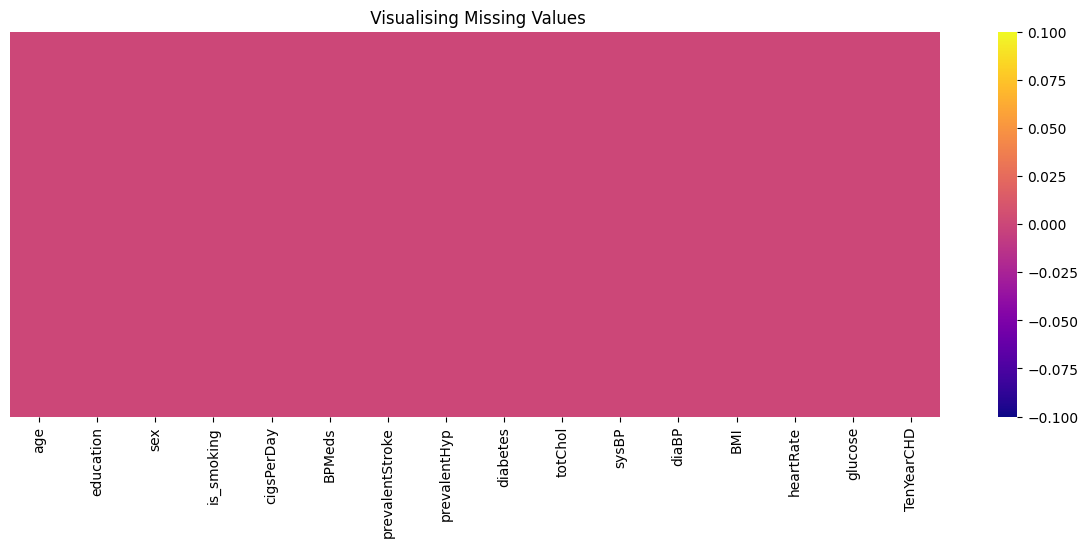

In [182]:
# Visualizing the missing values
import seaborn as sns
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(),cmap='plasma',annot=False,yticklabels=False)
plt.title(" Visualising Missing Values")

# Data Visualisation

In [183]:
var=[i for i in df.columns]

In [184]:
#splitting the categorical and continous variables for visualisation
var=[i for i in df.columns]
categorical=[]
continuous=[]
for j in var:
  if df[j].dtype=='float64' or df[j].dtype=='int64':
    continuous.append(j)
  else:
    categorical.append(j)





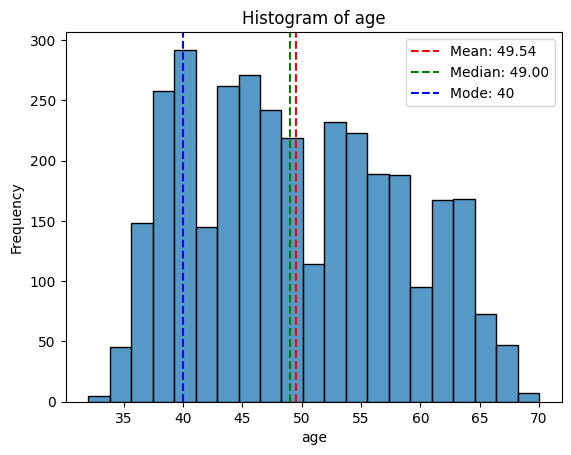

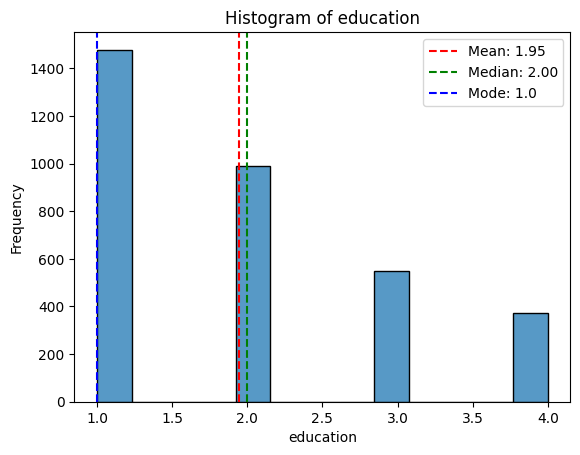

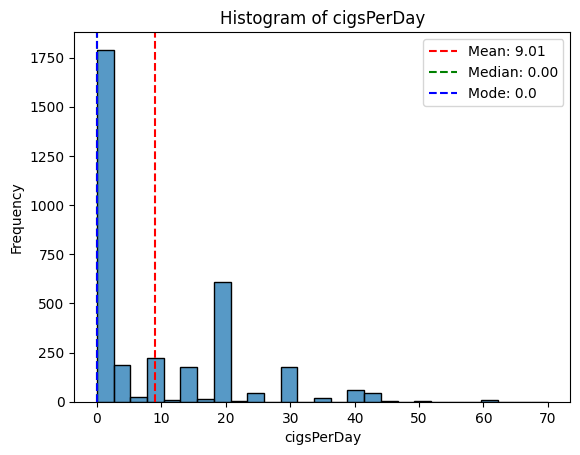

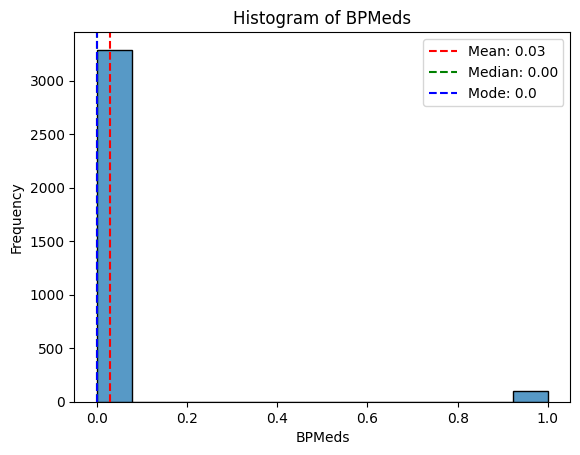

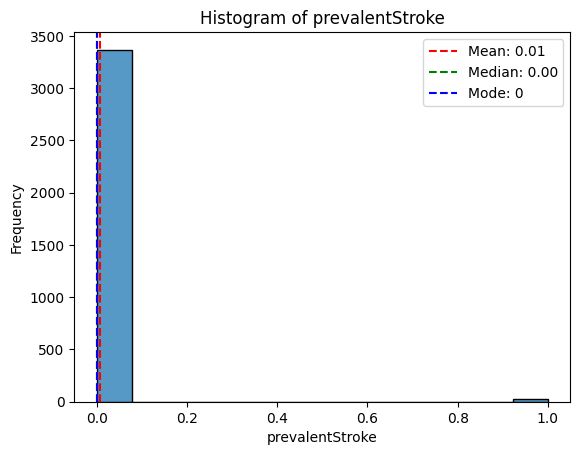

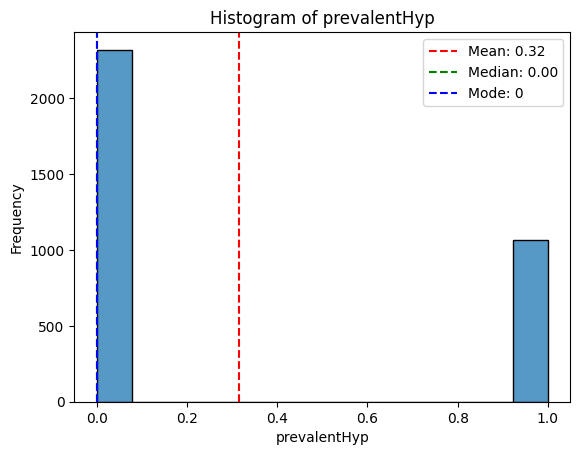

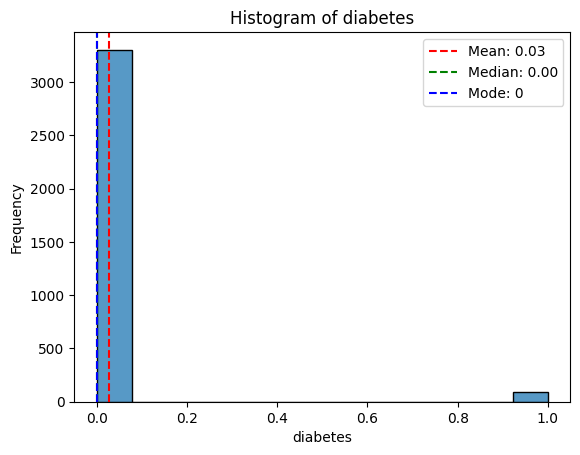

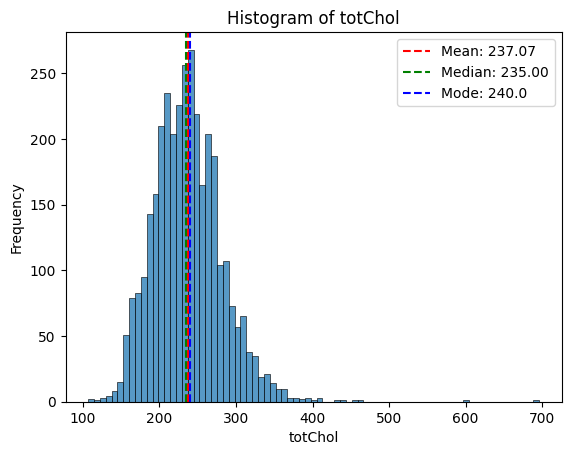

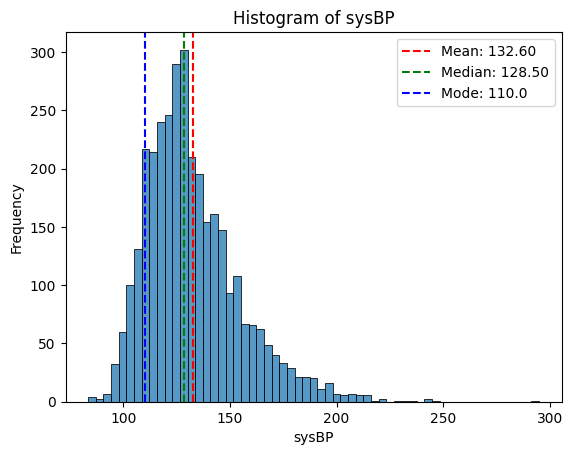

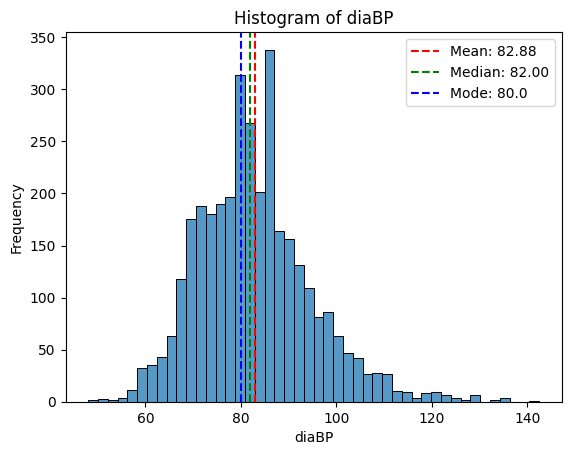

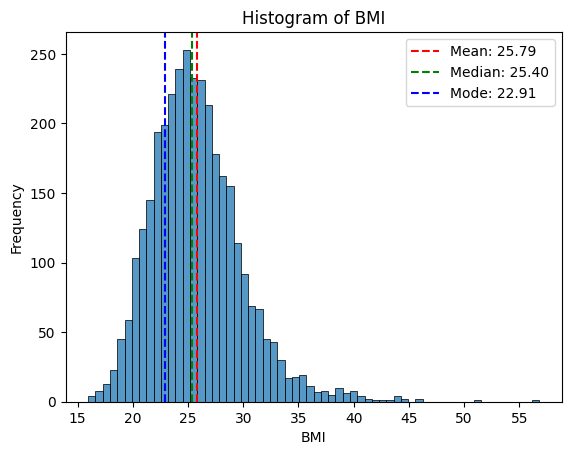

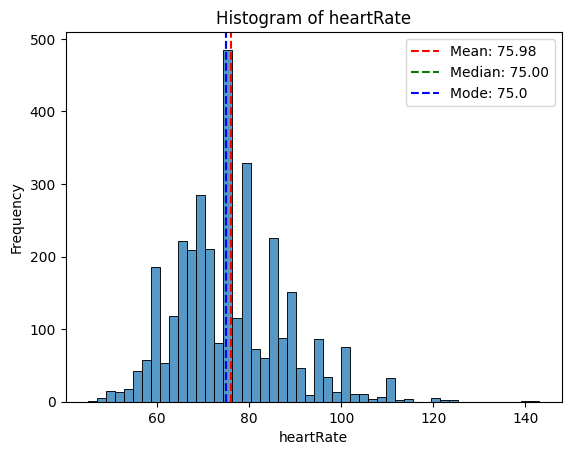

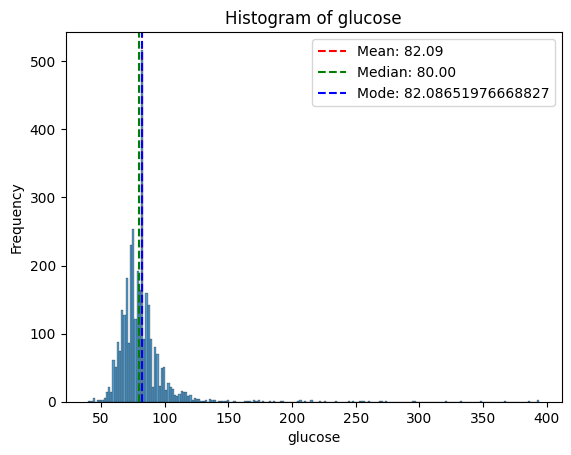

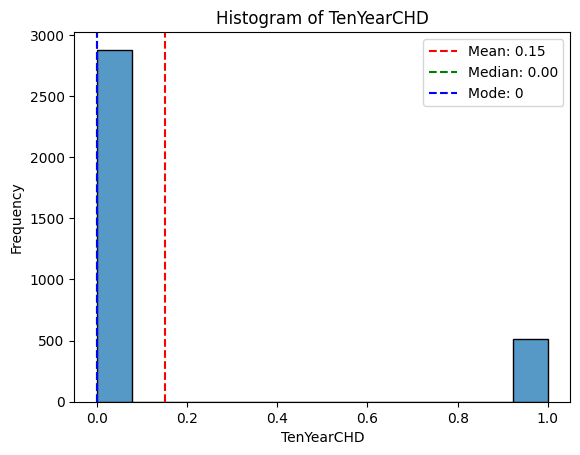

In [185]:
import seaborn as sns
import numpy as np

# Loop through continuous variables and create histogram plots
for var in continuous:
    # Check for missing values
    if df[var].isnull().sum() == 0:
        # Calculate mean, median, and mode
        mean_val = np.mean(df[var])
        median_val = np.median(df[var])
        mode_val = df[var].mode()[0]

        # Histogram plot
        sns.histplot(data=df, x=var)
        plt.title(f"Histogram of {var}")
        plt.xlabel(var)
        plt.ylabel("Frequency")

        # Add mean, median, and mode to the plot
        plt.axvline(mean_val, color='r', linestyle='--', label=f"Mean: {mean_val:.2f}")
        plt.axvline(median_val, color='g', linestyle='--', label=f"Median: {median_val:.2f}")
        plt.axvline(mode_val, color='b', linestyle='--', label=f"Mode: {mode_val}")

        plt.legend()
        plt.show()


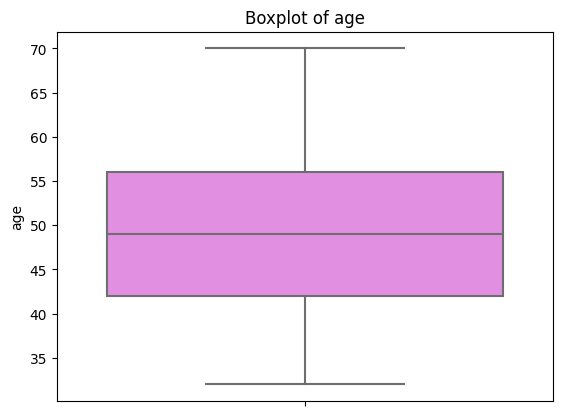

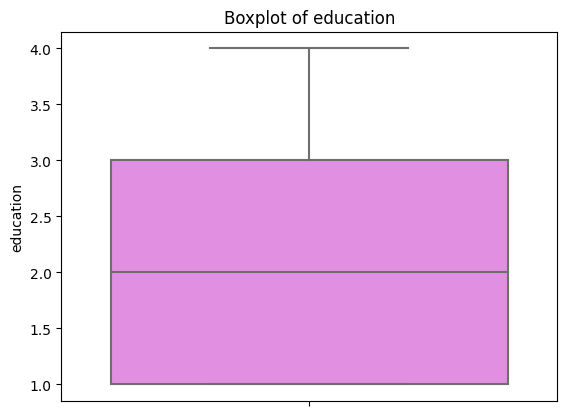

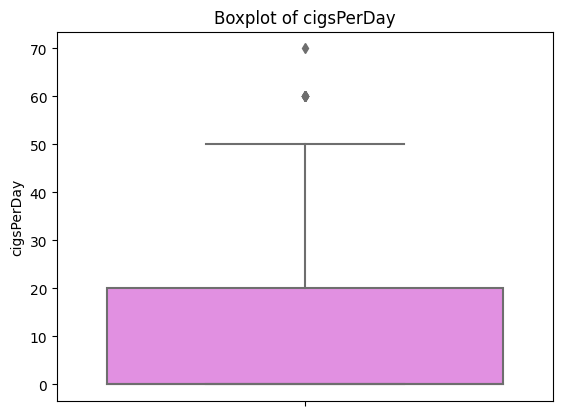

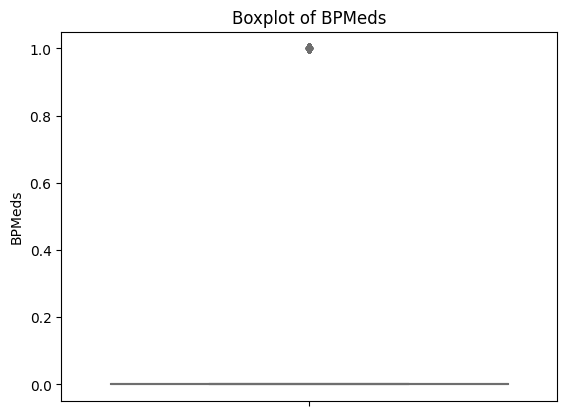

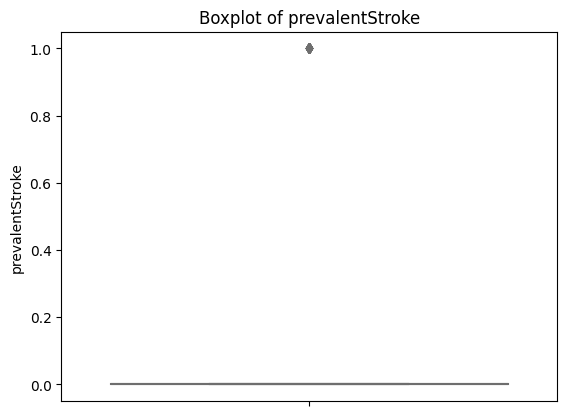

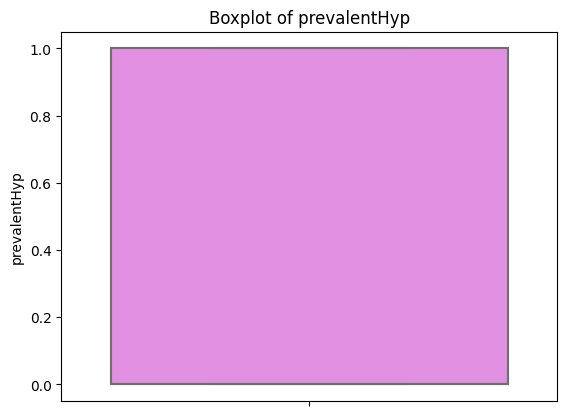

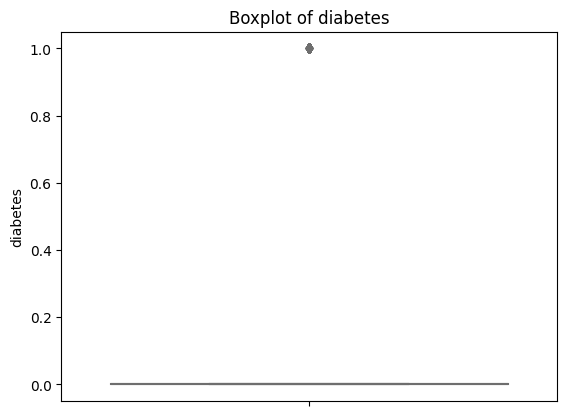

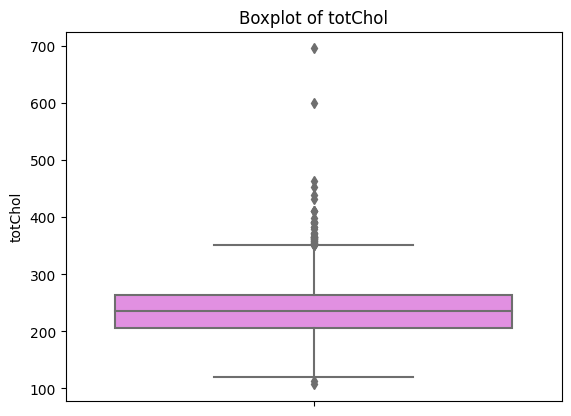

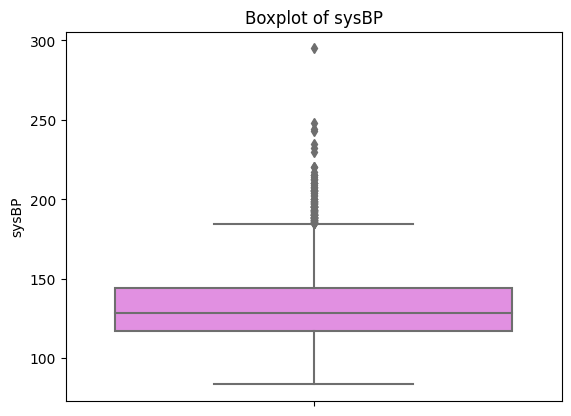

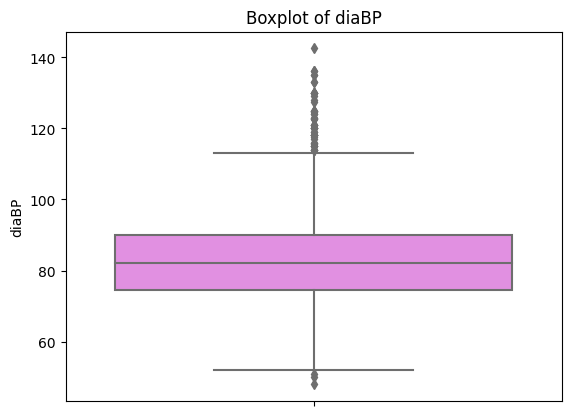

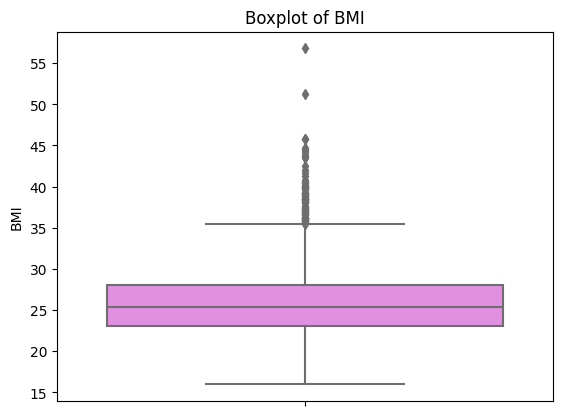

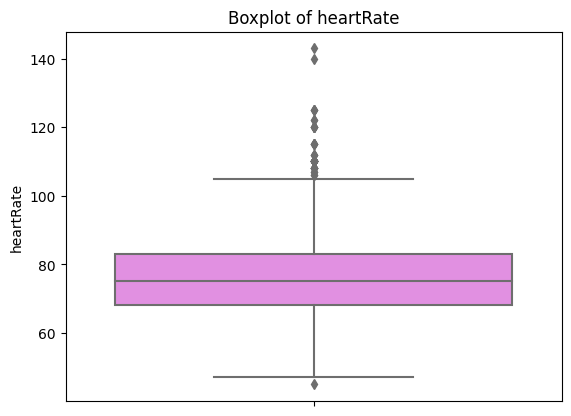

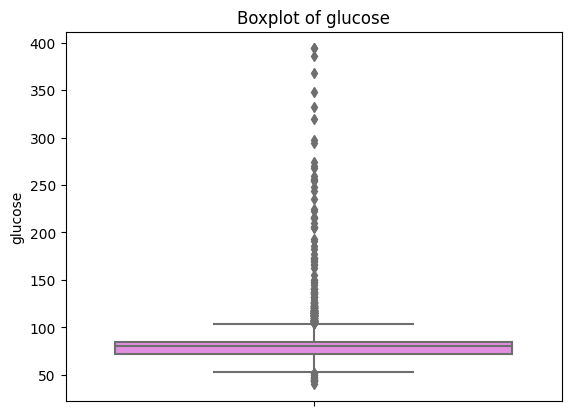

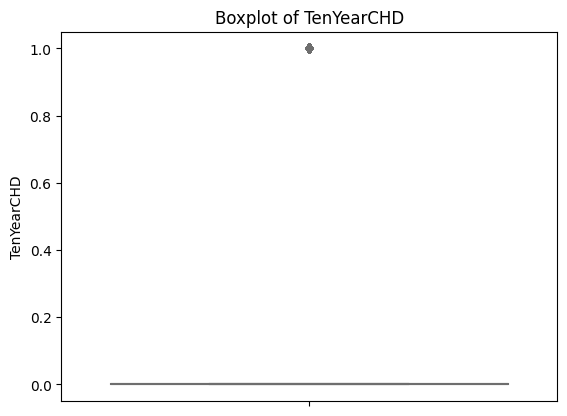

In [186]:
import seaborn as sns


# Loop through continuous variables and create boxplot plots
for var in continuous:
    # Check for missing values
    if df[var].isnull().sum() == 0:
        # Boxplot plot
        sns.boxplot(data=df, y=var,color='violet')
        plt.title(f"Boxplot of {var}")
        plt.ylabel(var)
        plt.show()


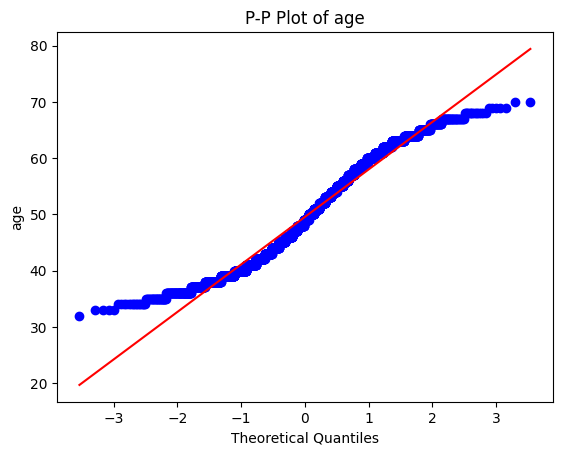

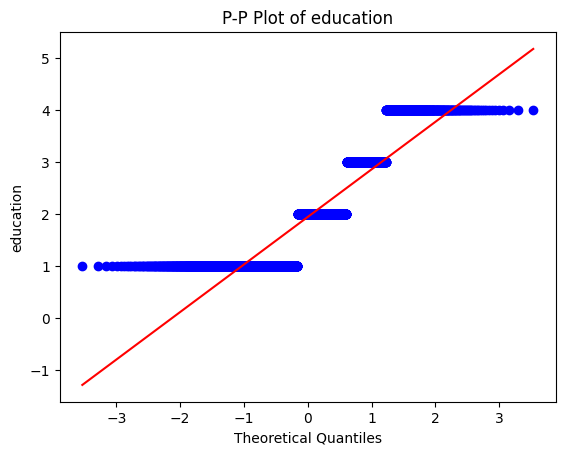

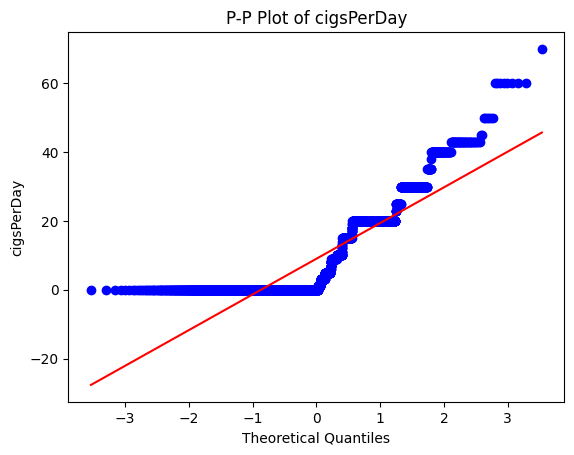

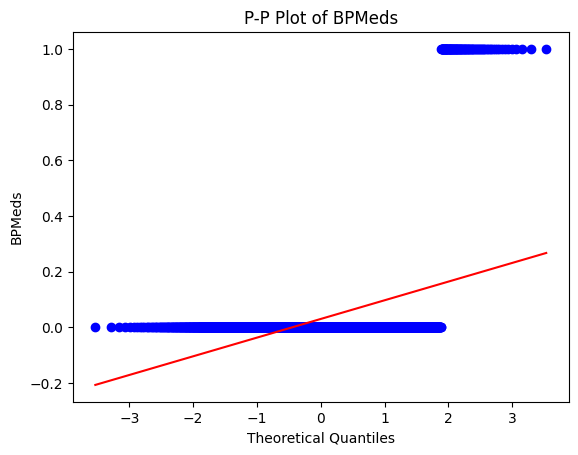

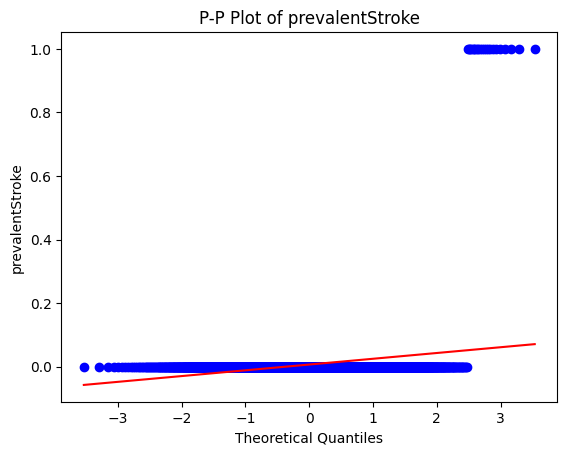

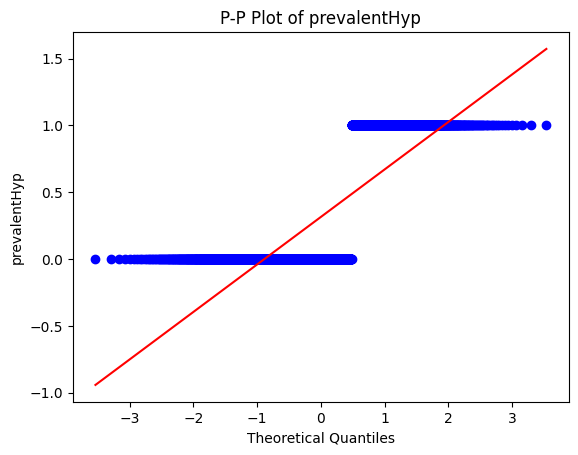

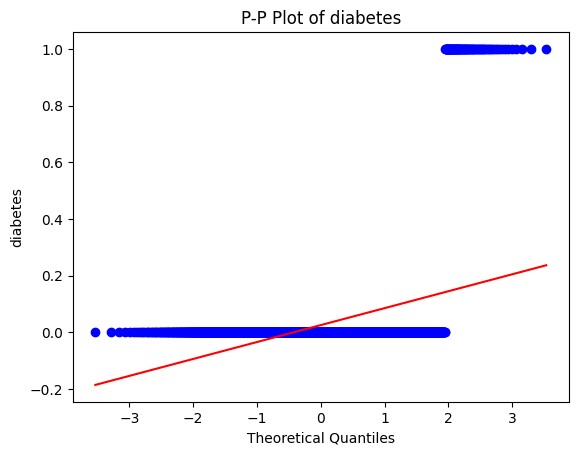

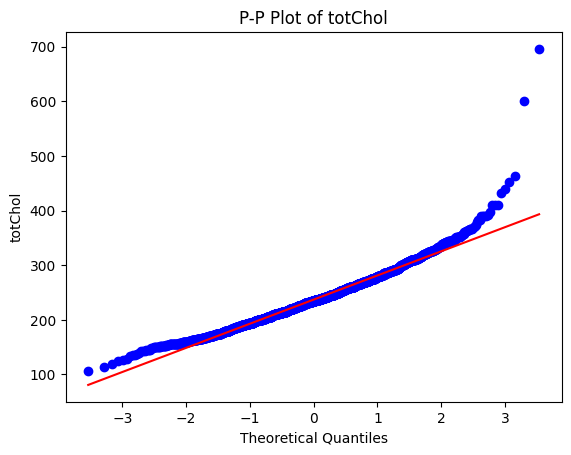

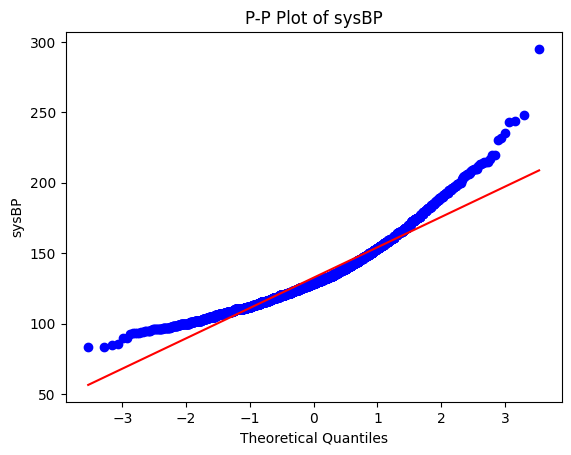

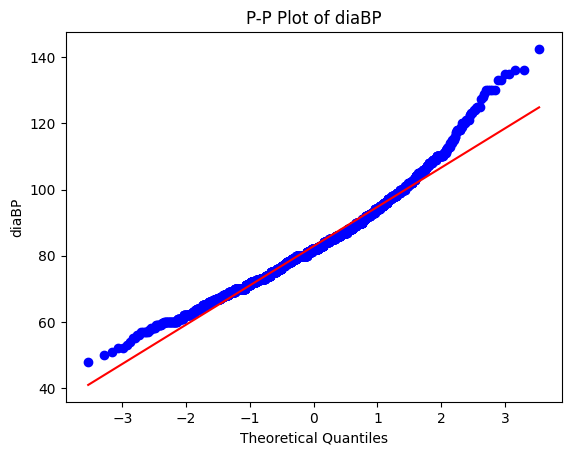

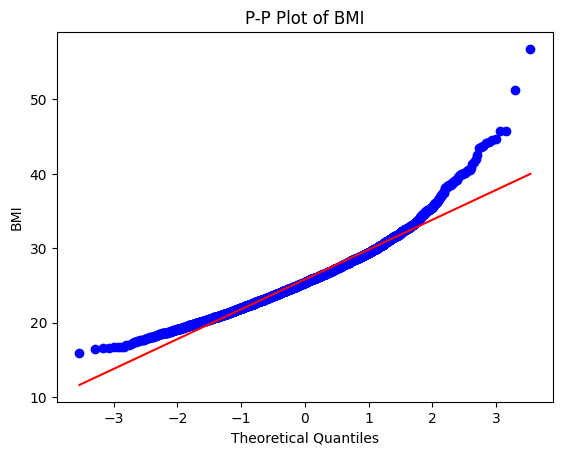

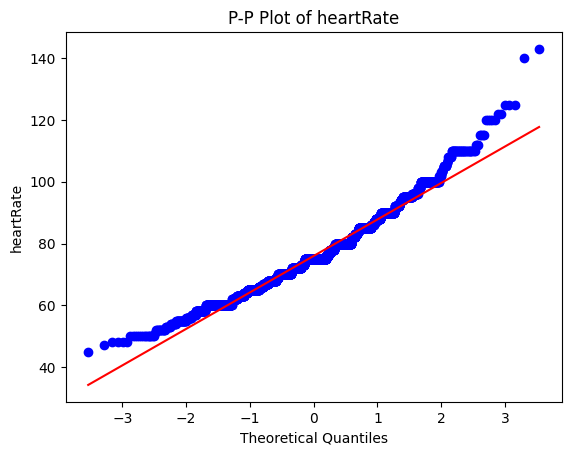

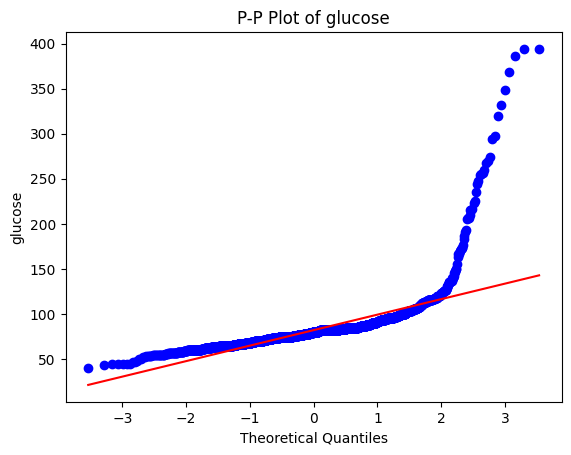

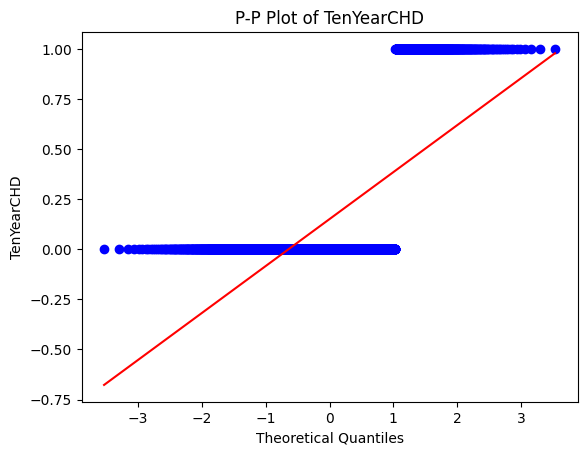

In [187]:
import scipy.stats as stats
import matplotlib.pyplot as plt


# Loop through continuous variables and create P-P plots
for var in continuous:
    # Check for missing values
    if df[var].isnull().sum() == 0:
        # Generate P-P plot
        stats.probplot(df[var], plot=plt)
        plt.title(f"P-P Plot of {var}")
        plt.xlabel("Theoretical Quantiles")
        plt.ylabel(f"{var}")
        plt.show()


<BarContainer object of 3390 artists>

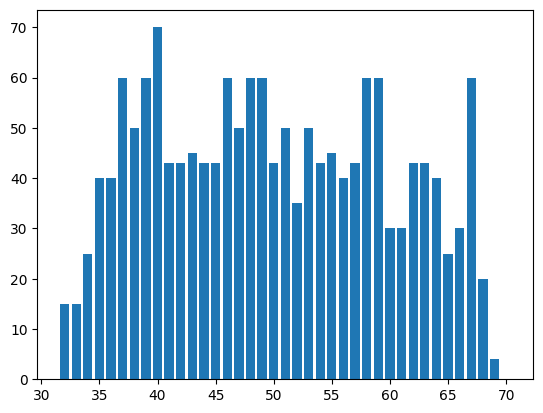

In [188]:
# barplot of at which age there is more consumption of smoking cigaretes per day
plt.bar(df['age'],df['cigsPerDay'])

In [189]:
categorical

['sex', 'is_smoking']

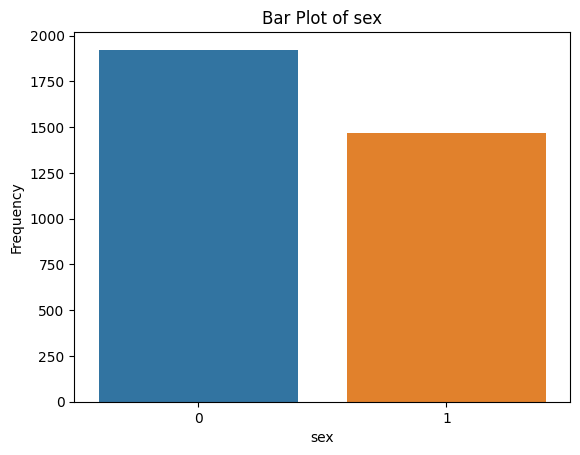

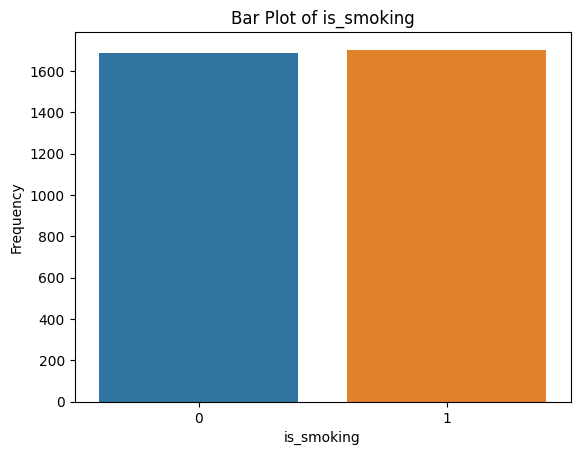

In [210]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' containing categorical columns
categorical_columns = ['sex', 'is_smoking']  # Add the names of your categorical columns

# Loop through categorical columns and create bar plots
for col in categorical_columns:
    # Count the frequencies of each category
    category_counts = df[col].value_counts()

    # Create a bar plot
    sns.barplot(x=category_counts.index, y=category_counts.values)
    plt.title(f"Bar Plot of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


# Observations

Age: The distribution of ages is slightly skewed to the right, with a few older individuals.

Education: The distribution of education levels is bimodal, with a peak at some college and a smaller peak at high school.

cigsPerDay: The distribution of cigarettes smoked per day is right-skewed, with most people smoking 0 cigarettes per day.

BPMeds: The distribution of BPMeds taken is right-skewed, with most people taking 0 BPMeds.

prevalentStroke: The distribution of prevalent strokes is right-skewed, with most people not having a prevalent stroke.

prevalentHyp: The distribution of prevalent hypertensions is right-skewed, with most people not having prevalent hypertension.

diabetes: The distribution of diabetes cases is right-skewed, with most people not having diabetes.

totChol: The distribution of total cholesterol levels is slightly skewed to the right.

sysBP: The distribution of systolic blood pressure levels is slightly skewed to the left.

diaBP: The distribution of diastolic blood pressure levels is slightly skewed to the right.

BMI: The distribution of BMI levels is slightly skewed to the right.

heartRate: The distribution of heart rates is symmetrical.

glucose: The distribution of glucose levels is slightly skewed to the right.

TenYearCHD: The distribution of TenYearCHD is right-skewed, with most people not having a high risk of coronary heart disease.

In the range of 35 to 48 there is more consumption of cigsperday



# Encoding the categorical columns

In [190]:
df['sex']=df['sex'].map({"F":0,"M":1})

In [191]:
df['is_smoking']=df['is_smoking'].map({"YES":0,'NO':1})

In [192]:
features=df.iloc[:,:-1]

In [193]:
features

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,64,2.0,0,0,3.0,0.0,0,0,0,221.0,148.0,85.0,25.794964,90.0,80.0
1,36,4.0,1,1,0.0,0.0,0,1,0,212.0,168.0,98.0,29.770000,72.0,75.0
2,46,1.0,0,0,10.0,0.0,0,0,0,250.0,116.0,71.0,20.350000,88.0,94.0
3,50,1.0,1,0,20.0,0.0,0,1,0,233.0,158.0,88.0,28.260000,68.0,94.0
4,64,1.0,0,0,30.0,0.0,0,0,0,241.0,136.5,85.0,26.420000,70.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,60,1.0,0,1,0.0,0.0,0,0,0,261.0,123.5,79.0,29.280000,70.0,103.0
3386,46,1.0,0,1,0.0,0.0,0,0,0,199.0,102.0,56.0,21.960000,80.0,84.0
3387,44,3.0,1,0,3.0,0.0,0,1,0,352.0,164.0,119.0,28.920000,73.0,72.0
3388,60,1.0,1,1,0.0,0.0,0,1,0,191.0,167.0,105.0,23.010000,80.0,85.0


# Checking Multicolinearity

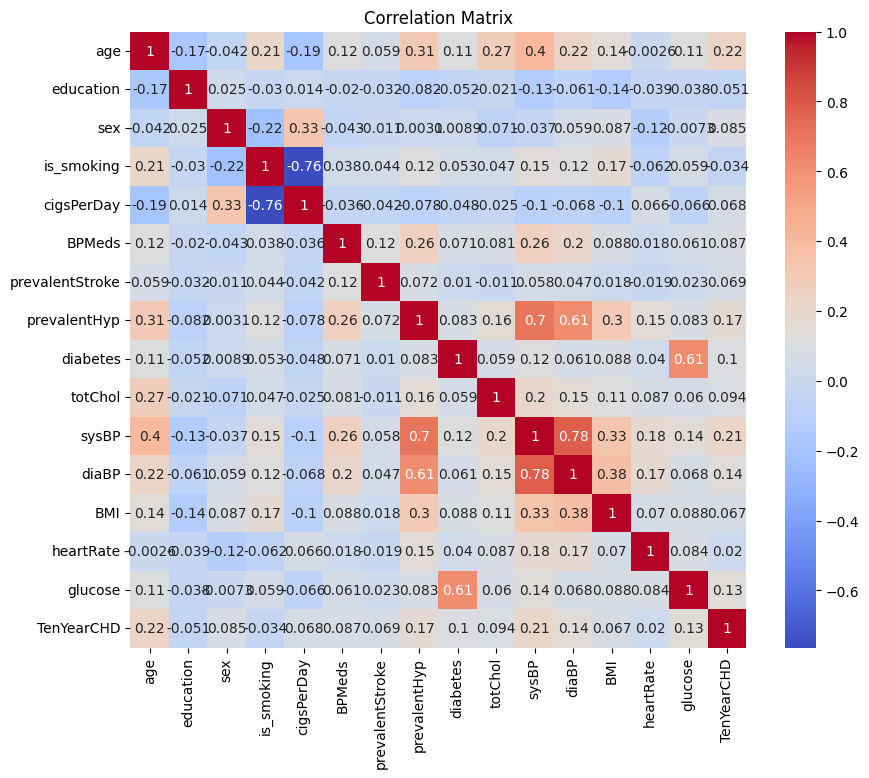

In [194]:
# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

# Observation
The independent variables are not highly correlated with each other.


# Class Imbalance

In [195]:
target=df['TenYearCHD']

In [196]:
features=df.iloc[:,:-1]

In [197]:
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Resample the data
Features, Target = smote.fit_resample(features,target)

In [198]:
Target.value_counts()

1    2879
0    2879
Name: TenYearCHD, dtype: int64

In [199]:
Target.shape

(5758,)

In [200]:
Features.shape

(5758, 15)

# Train Test Split

In [201]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [202]:
from sklearn.model_selection import train_test_split

In [203]:
X_train,X_test,y_train,y_test=train_test_split(Features,Target,random_state=33,test_size=.2)

In [204]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Model Selection

In [205]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score



# Initialize classifiers
classifiers = [

    ("Logistic Regression", LogisticRegression()),
    ("Naive Bayes", GaussianNB()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("K-Nearest Neighbors", KNeighborsClassifier()),
    ("Support Vector Machines", SVC()),
    ("Random Forest", RandomForestClassifier()),
    ('gradient_boosting',GradientBoostingClassifier()),
    ('Adaboostclassifier',AdaBoostClassifier()),
    ('XGB_classifier',XGBClassifier()),
    ('Neural Network Accuracy',MLPClassifier())
]

# Train and evaluate each classifier
for name, classifier in classifiers:
    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"{name} Accuracy: {accuracy}")


Logistic Regression Accuracy: 0.6866319444444444
Naive Bayes Accuracy: 0.6050347222222222
Decision Tree Accuracy: 0.8246527777777778
K-Nearest Neighbors Accuracy: 0.7621527777777778
Support Vector Machines Accuracy: 0.7256944444444444
Random Forest Accuracy: 0.9071180555555556
gradient_boosting Accuracy: 0.8298611111111112
Adaboostclassifier Accuracy: 0.8081597222222222
XGB_classifier Accuracy: 0.9019097222222222
Neural Network Accuracy Accuracy: 0.7482638888888888


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# observations
Randomforest is giving more accuracy so picking random forest model for parameter tuning for further improvement

# Parameter Tuning

In [206]:
from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble import RandomForestClassifier


# Define the parameter distribution for randomized search
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

# Create a RandomForestClassifier instance
rf = RandomForestClassifier(random_state=42)

# Perform randomized search
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=100, scoring='accuracy', cv=5, random_state=42)
random_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Evaluate the best model on the validation set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Best Hyperparameters: ", best_params)
print("Validation Accuracy: ", accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 36 is smaller than n_iter=100. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Hyperparameters:  {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
Validation Accuracy:  0.9123263888888888


In [207]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [208]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[543  43]
 [ 58 508]]
0.9123263888888888
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       586
           1       0.92      0.90      0.91       566

    accuracy                           0.91      1152
   macro avg       0.91      0.91      0.91      1152
weighted avg       0.91      0.91      0.91      1152



# Feature Importance

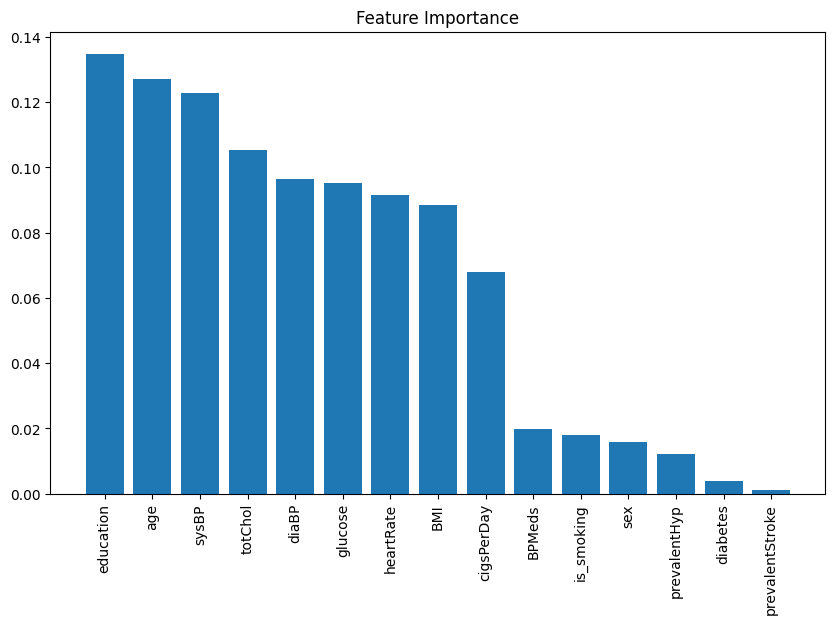

In [209]:
importances = random_search.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]
names = [Features.columns[i] for i in indices]
# Create plot
plt.figure(figsize=(10,6))

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(Features.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(Features.shape[1]), names, rotation=90)

# Show plot
plt.show()

# Conclusion
Accuracy: The initial accuracy of the Random Forest model is 90.71%, which indicates that the model correctly predicts the target variable in approximately 90.71% of the cases. After parameter tuning, the accuracy improved to 91.23%, indicating a slight enhancement in the model's performance.

Confusion Matrix: The confusion matrix provides insights into the model's performance in terms of true positives, true negatives, false positives, and false negatives. The confusion matrix shows the following:

True Positives (TP): 543
False Positives (FP): 43
False Negatives (FN): 58
True Negatives (TN): 508

Precision, Recall, and F1-Score: The classification report provides precision, recall, and F1-score for each class (0 and 1), along with support (number of instances) for each class. Here are the observations based on the classification report:

Class 0:

Precision: 90% - The model correctly identifies 90% of the instances belonging to class 0 out of all instances predicted as class 0.
Recall: 93% - The model correctly identifies 93% of the instances belonging to class 0 out of all instances that are actually class 0.
F1-score: 91% - The harmonic mean of precision and recall for class 0 is 91%.
Support: 586 instances belong to class 0.

Class 1:

Precision: 92% - The model correctly identifies 92% of the instances belonging to class 1 out of all instances predicted as class 1.
Recall: 90% - The model correctly identifies 90% of the instances belonging to class 1 out of all instances that are actually class 1.
F1-score: 91% - The harmonic mean of precision and recall for class 1 is 91%.
Support: 566 instances belong to class 1.

Overall Performance:
 The macro-average and weighted-average metrics provide an overall performance measure for the model:

Macro-Average: The macro-average calculates the average precision, recall, and F1-score across both classes, giving equal weight to each class. In this case, the macro-average precision, recall, and F1-score are all 91%, indicating a balanced performance across classes.

Weighted-Average:
The weighted-average calculates the average precision, recall, and F1-score across both classes, weighted by the support (number of instances) of each class. The weighted-average precision, recall, and F1-score are all 91%, indicating a balanced performance with respect to the class distribution.